In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:08<00:00, 125MB/s]
100% 1.06G/1.06G [00:08<00:00, 134MB/s]


In [4]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from keras import Sequential


In [6]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
test_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
def process(image,label):
  image=tf.cast(image/255,tf.float32)
  return image,label
train_ds=train_ds.map(process)
test_ds=test_ds.map(process)

In [8]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [10]:
model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 [==============================] - 72s 86ms/step - loss: 0.6005 - accuracy: 0.6664 - val_loss: 0.4923 - val_accuracy: 0.7560
Epoch 2/10
625/625 [==============================] - 54s 85ms/step - loss: 0.4654 - accuracy: 0.7767 - val_loss: 0.4634 - val_accuracy: 0.7834
Epoch 3/10
625/625 [==============================] - 54s 86ms/step - loss: 0.3669 - accuracy: 0.8347 - val_loss: 0.5447 - val_accuracy: 0.7912
Epoch 4/10
625/625 [==============================] - 56s 88ms/step - loss: 0.2516 - accuracy: 0.8944 - val_loss: 0.6458 - val_accuracy: 0.7832
Epoch 5/10
625/625 [==============================] - 58s 92ms/step - loss: 0.1438 - accuracy: 0.9427 - val_loss: 0.9001 - val_accuracy: 0.7754
Epoch 6/10
625/625 [==============================] - 53s 85ms/step - loss: 0.0898 - accuracy: 0.9675 - val_loss: 1.4197 - val_accuracy: 0.7428
Epoch 7/10
625/625 [==============================] - 56s 89ms/step - loss: 0.0582 - accuracy: 0.9799 - val_loss: 1.0263 - val_accuracy:

In [13]:
import cv2
import matplotlib.pyplot as plt

In [14]:
img=cv2.imread('/content/cat.jpg')

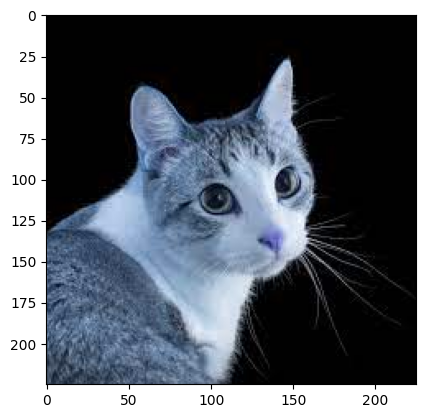

In [18]:
plt.imshow(img)

In [28]:
test=cv2.resize(img,(256,256))
test1=test.reshape((1,256,256,3))

In [29]:
model.predict(test1)

1/1 [==============================] - 0s 218ms/step


array([[0.]], dtype=float32)